# RANDOM-FOREST

## Base Risco Crédito

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export

import graphviz

In [9]:
base = pd.read_csv('/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Machine Learning n Data Science de A a Z/risco_credito.csv')

#x e y
previsores = base.iloc[:,0:4].values
classe = base.iloc[:,4].values

In [10]:
# transformando as variaveis categoricas em numericas
labelencoder = LabelEncoder()

previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])

In [12]:
# treinando
classificador = DecisionTreeClassifier(criterion='entropy' )
classificador.fit(previsores, classe)

# importancia das features
print(classificador.feature_importances_) #segue a mesma ordem da base de dados

[0.41391643 0.06408636 0.03885431 0.4831429 ]


In [14]:
# Visualizando a arvore
export.export_graphviz(classificador, out_file='arvore.dot',
                      feature_names=['historia', 'divida', 'garantias', 'renda'],
                      class_names=['alto', 'moderado', 'baixo'],
                      filled=True,
                      leaves_parallel=True)

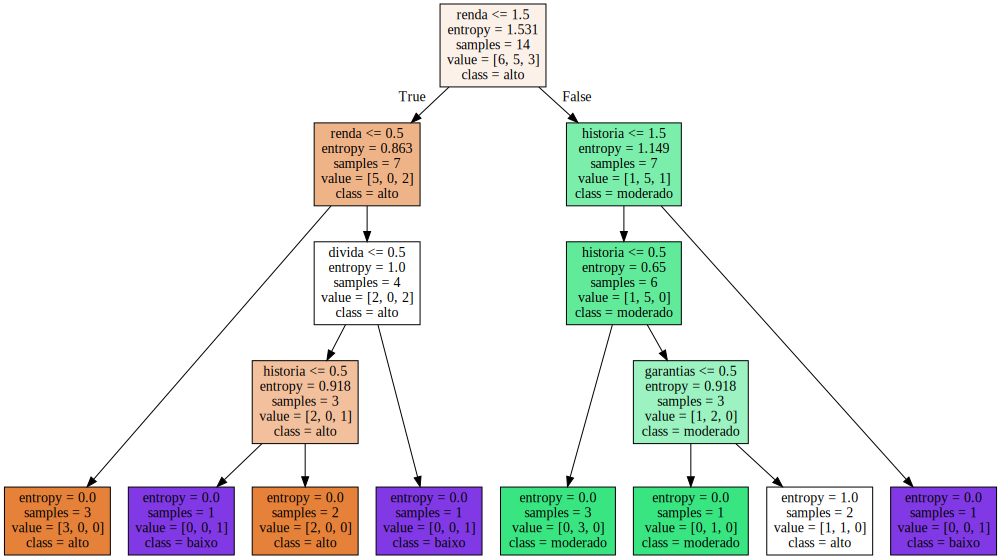

In [18]:
# Visualizando a arvore
with open("arvore.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)